In [2]:
import sympy as sp 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

In [8]:
x1, v1, x2, v2, T, tau, a, b, c = sp.symbols('x1, v1, x2, v2, T, tau, a, b, c')

f1 = sp.Matrix([1/tau*(c-a*x2-b*v1)-x1,
                     1/T*(x1-v1),
                     1/tau*(c-a*x1-b*v2)-x2,
                     1/T*(x2-v2)])

f2 = sp.Matrix([1/tau*(c-0-b*v1)-x1,
                     1/T*(0-v1),
                     1/tau*(c-0-b*v2)-x2,
                     1/T*(0-v2)])


p1 = sp.solve(f1,(x1,v1,x2,v2))
p2 = sp.solve(f2,(x1,v1,x2,v2))

display(p1)
display(p2)

{x1: c/(a + b + tau),
 v1: c/(a + b + tau),
 x2: c/(a + b + tau),
 v2: c/(a + b + tau)}

{x1: c/tau, v1: 0, x2: c/tau, v2: 0}

In [7]:
A1 = f1.jacobian((x1,v1,x2,v2)).subs([(x1,p1[x1]),(v1,p1[v1]),(x2,p1[x2]),(v2,p1[v2])])
A2 = f1.jacobian((x1,v1,x2,v2)).subs([(x1,p2[x1]),(v1,p2[v1]),(x2,p2[x2]),(v2,p2[v2])])

display(A1)
display(A2)

Matrix([
[    -1, -b/tau, -a/tau,      0],
[   1/T,   -1/T,      0,      0],
[-a/tau,      0,     -1, -b/tau],
[     0,      0,    1/T,   -1/T]])

Matrix([
[    -1, -b/tau, -a/tau,      0],
[   1/T,   -1/T,      0,      0],
[-a/tau,      0,     -1, -b/tau],
[     0,      0,    1/T,   -1/T]])

In [12]:
l = sp.symbols("l")
charp1 = A1.charpoly(l)
charp2 = A1.charpoly(l)
charp1

PurePoly(l**4 + (2*T + 2)/T*l**3 + (-T**2*a**2 + T**2*tau**2 + 2*T*b*tau + 4*T*tau**2 + tau**2)/(T**2*tau**2)*l**2 + (-2*T*a**2 + 2*T*b*tau + 2*T*tau**2 + 2*b*tau + 2*tau**2)/(T**2*tau**2)*l + (-a**2 + b**2 + 2*b*tau + tau**2)/(T**2*tau**2), l, domain='ZZ(a,b,T,tau)')

In [37]:
# Numerical Function
def q_dot(t,x,args):
    x1, v1, x2, v2, = x
    T, tau, a, b, c = args;
    return np.array([1/tau*(c-a*np.maximum(0,x2)-b*v1)-x1,
                     1/T*(np.maximum(0,x1)-v1),
                     1/tau*(c-a*np.maximum(0,x1)-b*v2)-x2,
                     1/T*(np.maximum(0,x2)-v2)])

In [91]:
arg = [2.5,2.5,1.5,0.25,0.5]
fsolve(lambda x: q_dot(1,x,arg),[0,0,0,0])

array([0.11764706, 0.11764706, 0.11764706, 0.11764706])

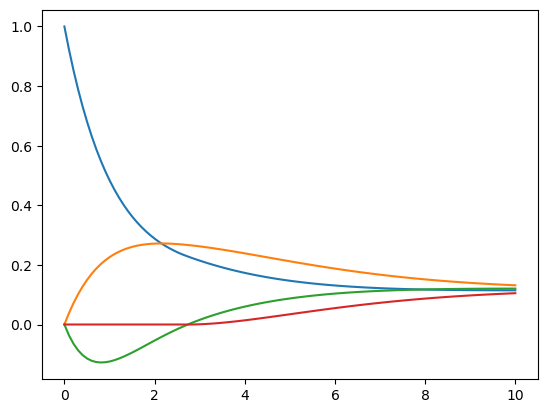

In [94]:
x0 = [[1,0,0,0]]
t = np.linspace(0,10,100)
s = []
for i in range(len(x0)):
    s.append(solve_ivp(q_dot, [0, max(t)],x0[i], args=[arg], t_eval=t).y)

plt.plot(t,s[0][0])
plt.plot(t,s[0][1])
plt.plot(t,s[0][2])
plt.plot(t,s[0][3])

In [12]:
# def plot_system(f,t,arg,x0,xlims,ylims,res):
    
#     s = []
#     for i in range(len(x0)):
#         s.append(solve_ivp(f, [0, max(t)],x0[i], args=[arg], t_eval=t).y)
        
#     xmin,xmax, = xlims
#     ymin,ymax, = ylims
    
#     x = np.linspace(xmin,xmax,res)
#     y = np.linspace(ymin,ymax,res)
    
#     X, Y = np.meshgrid(x,y)
#     XY = [X, Y]

#     UV = f(t,XY,args)
#     U, V = UV
    
#     mag = sqrt(np.power(U,2) + np.power(V,2))
#     Uhat = np.divide(U, mag, out=np.zeros_like(U),where=mag!=0)
#     Vhat = np.divide(V, mag, out=np.zeros_like(U),where=mag!=0)
    
#     fig = plt.figure(figsize=(12,4))
    
#     gs0 = gridspec.GridSpec(1, 1, figure=fig)
    
#     gs00 = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs0[0])

#     ax1 = fig.add_subplot(gs00[:, :-1])
#     ax2 = fig.add_subplot(gs00[-0, -1])
#     ax3 = fig.add_subplot(gs00[-1, -1])

#     ax1.quiver(X,Y,Uhat,Vhat)
#     ax1.plot(s1[0,:],s1[1,:])
#     ax1.plot(s2[0,:],s2[1,:])
#     ax1.plot(s3[0,:],s3[1,:])
#     ax1.set_xlim([xmin,xmax])
#     ax1.set_ylim([ymin,ymax])
#     ax2.plot(t,s1[0])
#     ax2.plot(t,s2[0])
#     ax2.plot(t,s3[0])
#     ax3.plot(t,s1[1])
#     ax3.plot(t,s2[1])
#     ax3.plot(t,s3[1])
#     return [ax1, ax2, ax3]

In [26]:
t = np.linspace(1,10,10)
args = [1,1,1,1,1]
x0 = [[0,0,0,0]]
xlims = [-10,10]
ylims = [-10,10]
res = 50


# plot_system(q_dot,t,args,x0,xlims,ylims,res)

ValueError: not enough values to unpack (expected 4, got 2)

In [5]:
len(a)

3